
Available images in the folder:
1. noisy_10961455225_0786d3edd2_c.jpg
2. noisy_1110822219_a079aeff30_c.jpg
3. noisy_11905744206_c9273e7489_c.jpg
4. noisy_11957512115_382fbccc03_c.jpg
5. noisy_127215712_ff5b654d07_c.jpg
6. noisy_1286073711_06165cae4c_c.jpg
7. noisy_12987770865_fe17618f19_c.jpg
8. noisy_12987811255_7135b5ecbd_c.jpg
9. noisy_12988124424_18a549ee57_c.jpg
10. noisy_13436252374_316e4599b3_c.jpg
11. noisy_13896128349_7b90ec6039_c.jpg
12. noisy_14099227957_2932386d88_c.jpg
13. noisy_14344194855_629eeda1a0_c.jpg
14. noisy_144839343_db2326a111_c.jpg
15. noisy_14888751212_5e802d8a2d_c.jpg
16. noisy_15135568915_7b836b9bc9_c.jpg
17. noisy_15236809297_c33917a48c_c.jpg
18. noisy_15307379319_b8c23e52d5_c.jpg
19. noisy_15363588760_764dafdce4_c.jpg
20. noisy_15450699883_1163793e69_c.jpg
21. noisy_15623223185_e4206be390_c.jpg
22. noisy_15904356149_aa61e5c5eb_c.jpg
23. noisy_16064376356_623e236f3c_c.jpg
24. noisy_16586971521_ddd2cffde1_c.jpg
25. noisy_16705397107_ec00b87bdb_c.jpg
26. noi

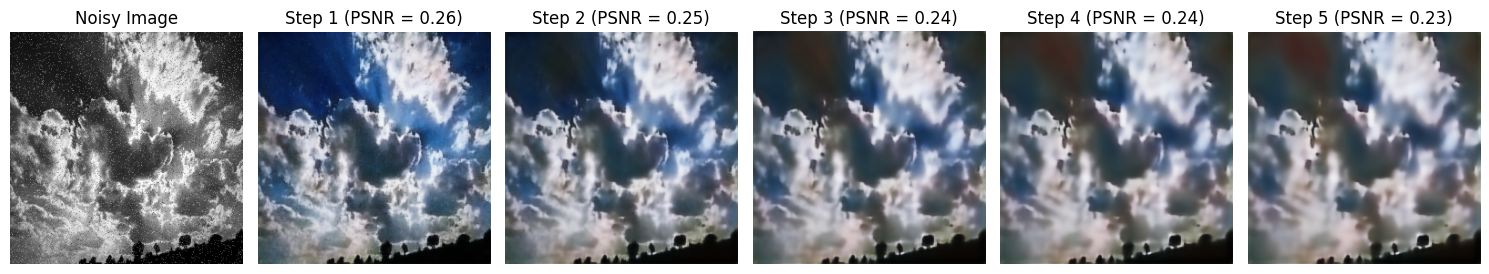

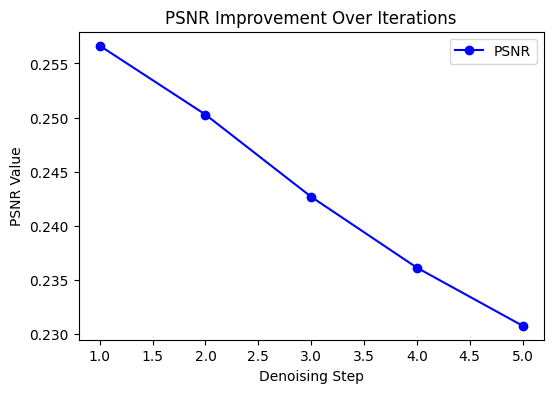

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the trained model
model_path = "C:\\Users\\nandh\\Desktop\\project files\\a_deeper_unet_model.keras"
model = load_model(model_path)

def preprocess_single_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def iterative_denoising(image, clean_image=None, steps=5):
    """Applies multiple inference steps for better denoising and tracks improvements."""
    denoised_images = [image[0]]  # Store intermediate results
    psnr_values = []

    for step in range(steps):
        image = model.predict(image)
        denoised_image = image[0]

        if clean_image is not None:
            psnr_step = psnr(clean_image, denoised_image)
        else:
            psnr_step = np.std(denoised_image)  # Approximate noise level

        psnr_values.append(psnr_step)
        denoised_images.append(denoised_image)

        # Print PSNR only for the first 3 steps
        if step < 3:
            print(f"Step {step + 1}: PSNR = {psnr_step:.2f}")

    return denoised_images, psnr_values


# Folder containing noisy images
noisy_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Noisy_folder"
clean_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Ground_truth"  # If available
output_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Reconstructed_images"
os.makedirs(output_folder, exist_ok=True)

# List all images in the noisy folder
noisy_images = [img for img in os.listdir(noisy_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

if not noisy_images:
    print("No noisy images found in the folder.")
else:
    print("\nAvailable images in the folder:")
    for idx, img_name in enumerate(noisy_images):
        print(f"{idx + 1}. {img_name}")

    # User selects an image
    choice = int(input("\nEnter the number of the image to denoise: ")) - 1
    if choice < 0 or choice >= len(noisy_images):
        print("Invalid choice! Exiting.")
    else:
        selected_image_name = noisy_images[choice]
        noisy_image_path = os.path.join(noisy_folder, selected_image_name)
        clean_image_path = os.path.join(clean_folder, selected_image_name)

        # Load noisy image
        noisy_image = preprocess_single_image(noisy_image_path)

        # Load clean image if available
        if os.path.exists(clean_image_path):
            clean_image = preprocess_single_image(clean_image_path)[0]
        else:
            clean_image = None

        # Perform iterative denoising
        denoised_images, psnr_values = iterative_denoising(noisy_image, clean_image, steps=5)

        # Save final denoised image
        final_denoised_image = denoised_images[-1]
        output_path = os.path.join(output_folder, f"denoised_{selected_image_name}")
        denoised_bgr = cv2.cvtColor((final_denoised_image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, denoised_bgr)
        print(f"\nFinal denoised image saved to: {output_path}")

        # Plot all denoising steps
        plt.figure(figsize=(15, 5))

        for i, img in enumerate(denoised_images):
            plt.subplot(1, len(denoised_images), i + 1)
            plt.imshow(img)
            if i == 0:
                plt.title("Noisy Image")
            else:
                plt.title(f"Step {i} (PSNR = {psnr_values[i-1]:.2f})")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Plot PSNR improvement trend
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, len(psnr_values) + 1), psnr_values, marker='o', linestyle='-', color='b', label='PSNR')
        plt.xlabel("Denoising Step")
        plt.ylabel("PSNR Value")
        plt.title("PSNR Improvement Over Iterations")
        plt.legend()
        plt.show()



Available images in the folder:
1. noisy_10961455225_0786d3edd2_c.jpg
2. noisy_1110822219_a079aeff30_c.jpg
3. noisy_11905744206_c9273e7489_c.jpg
4. noisy_11957512115_382fbccc03_c.jpg
5. noisy_127215712_ff5b654d07_c.jpg
6. noisy_1286073711_06165cae4c_c.jpg
7. noisy_12987770865_fe17618f19_c.jpg
8. noisy_12987811255_7135b5ecbd_c.jpg
9. noisy_12988124424_18a549ee57_c.jpg
10. noisy_13436252374_316e4599b3_c.jpg
11. noisy_13896128349_7b90ec6039_c.jpg
12. noisy_14099227957_2932386d88_c.jpg
13. noisy_14344194855_629eeda1a0_c.jpg
14. noisy_144839343_db2326a111_c.jpg
15. noisy_14888751212_5e802d8a2d_c.jpg
16. noisy_15135568915_7b836b9bc9_c.jpg
17. noisy_15236809297_c33917a48c_c.jpg
18. noisy_15307379319_b8c23e52d5_c.jpg
19. noisy_15363588760_764dafdce4_c.jpg
20. noisy_15450699883_1163793e69_c.jpg
21. noisy_15623223185_e4206be390_c.jpg
22. noisy_15904356149_aa61e5c5eb_c.jpg
23. noisy_16064376356_623e236f3c_c.jpg
24. noisy_16586971521_ddd2cffde1_c.jpg
25. noisy_16705397107_ec00b87bdb_c.jpg
26. noi

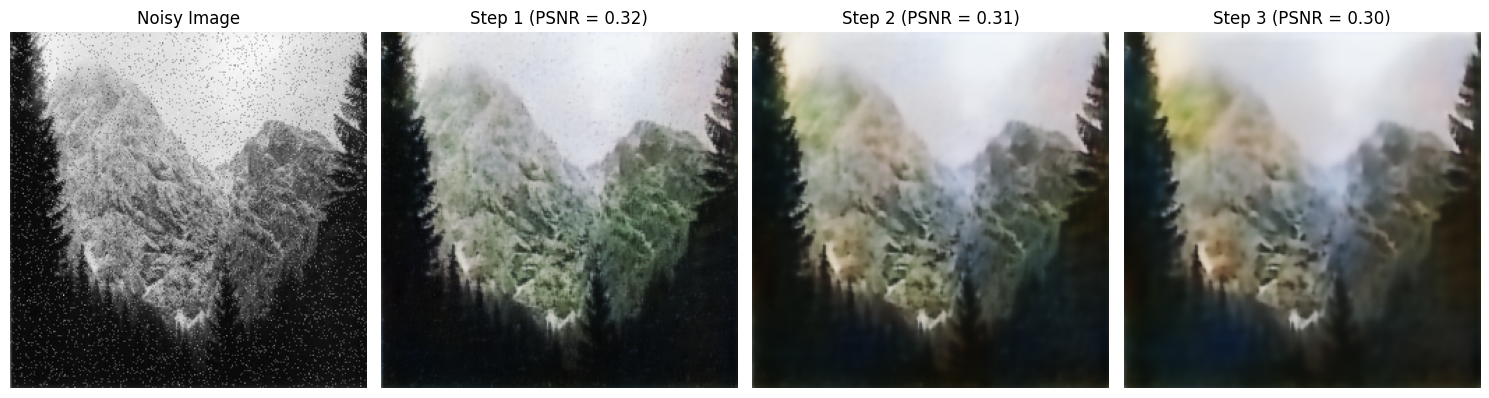

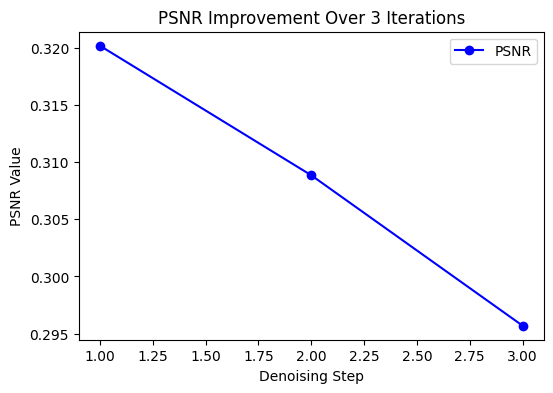

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the trained model
model_path = "C:\\Users\\nandh\\Desktop\\project files\\a_deeper_unet_model.keras"
model = load_model(model_path)

def preprocess_single_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def iterative_denoising(image, clean_image=None, steps=5):
    """Applies multiple inference steps for better denoising and tracks improvements."""
    denoised_images = [image[0]]  # Store intermediate results
    psnr_values = []

    for step in range(steps):
        image = model.predict(image)
        denoised_image = image[0]

        if clean_image is not None:
            psnr_step = psnr(clean_image, denoised_image)
        else:
            psnr_step = np.std(denoised_image)  # Approximate noise level

        psnr_values.append(psnr_step)
        denoised_images.append(denoised_image)

        # Print only the first 3 steps
        if step < 3:
            print(f"Step {step + 1}: PSNR = {psnr_step:.2f}")

    return denoised_images, psnr_values


# Folder containing noisy images
noisy_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Noisy_folder"
clean_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Ground_truth"  # If available
output_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Reconstructed_images"
os.makedirs(output_folder, exist_ok=True)

# List all images in the noisy folder
noisy_images = [img for img in os.listdir(noisy_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

if not noisy_images:
    print("No noisy images found in the folder.")
else:
    print("\nAvailable images in the folder:")
    for idx, img_name in enumerate(noisy_images):
        print(f"{idx + 1}. {img_name}")

    # User selects an image
    choice = int(input("\nEnter the number of the image to denoise: ")) - 1
    if choice < 0 or choice >= len(noisy_images):
        print("Invalid choice! Exiting.")
    else:
        selected_image_name = noisy_images[choice]
        noisy_image_path = os.path.join(noisy_folder, selected_image_name)
        clean_image_path = os.path.join(clean_folder, selected_image_name)

        # Load noisy image
        noisy_image = preprocess_single_image(noisy_image_path)

        # Load clean image if available
        if os.path.exists(clean_image_path):
            clean_image = preprocess_single_image(clean_image_path)[0]
        else:
            clean_image = None

        # Perform iterative denoising
        denoised_images, psnr_values = iterative_denoising(noisy_image, clean_image, steps=5)

        # Save final denoised image
        final_denoised_image = denoised_images[-1]
        output_path = os.path.join(output_folder, f"denoised_{selected_image_name}")
        denoised_bgr = cv2.cvtColor((final_denoised_image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, denoised_bgr)
        print(f"\nFinal denoised image saved to: {output_path}")

        # Plot first 3 denoising steps
        steps_to_show = min(3, len(denoised_images) - 1)

        plt.figure(figsize=(15, 5))
        for i in range(steps_to_show + 1):  # +1 to include noisy image
            plt.subplot(1, steps_to_show + 1, i + 1)
            plt.imshow(denoised_images[i])
            if i == 0:
                plt.title("Noisy Image")
            else:
                plt.title(f"Step {i} (PSNR = {psnr_values[i-1]:.2f})")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Plot PSNR improvement trend (only first 3 values)
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, steps_to_show + 1), psnr_values[:steps_to_show], marker='o', linestyle='-', color='b', label='PSNR')
        plt.xlabel("Denoising Step")
        plt.ylabel("PSNR Value")
        plt.title("PSNR Improvement Over 3 Iterations")
        plt.legend()
        plt.show()



Available images in the folder:
1. noisy_10961455225_0786d3edd2_c.jpg
2. noisy_1110822219_a079aeff30_c.jpg
3. noisy_11905744206_c9273e7489_c.jpg
4. noisy_11957512115_382fbccc03_c.jpg
5. noisy_127215712_ff5b654d07_c.jpg
6. noisy_1286073711_06165cae4c_c.jpg
7. noisy_12987770865_fe17618f19_c.jpg
8. noisy_12987811255_7135b5ecbd_c.jpg
9. noisy_12988124424_18a549ee57_c.jpg
10. noisy_13436252374_316e4599b3_c.jpg
11. noisy_13896128349_7b90ec6039_c.jpg
12. noisy_14099227957_2932386d88_c.jpg
13. noisy_14344194855_629eeda1a0_c.jpg
14. noisy_144839343_db2326a111_c.jpg
15. noisy_14888751212_5e802d8a2d_c.jpg
16. noisy_15135568915_7b836b9bc9_c.jpg
17. noisy_15236809297_c33917a48c_c.jpg
18. noisy_15307379319_b8c23e52d5_c.jpg
19. noisy_15363588760_764dafdce4_c.jpg
20. noisy_15450699883_1163793e69_c.jpg
21. noisy_15623223185_e4206be390_c.jpg
22. noisy_15904356149_aa61e5c5eb_c.jpg
23. noisy_16064376356_623e236f3c_c.jpg
24. noisy_16586971521_ddd2cffde1_c.jpg
25. noisy_16705397107_ec00b87bdb_c.jpg
26. noi

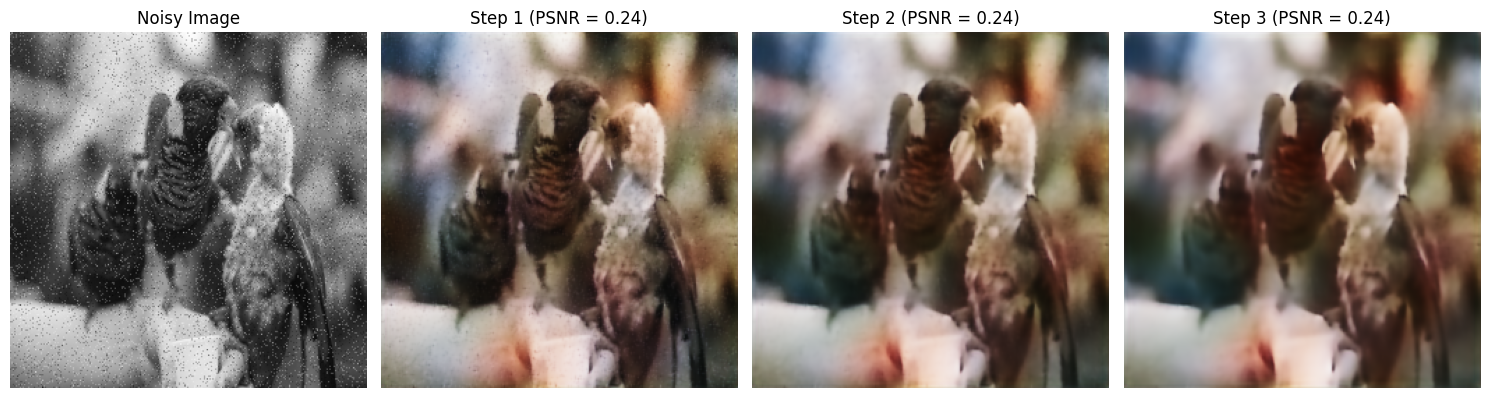

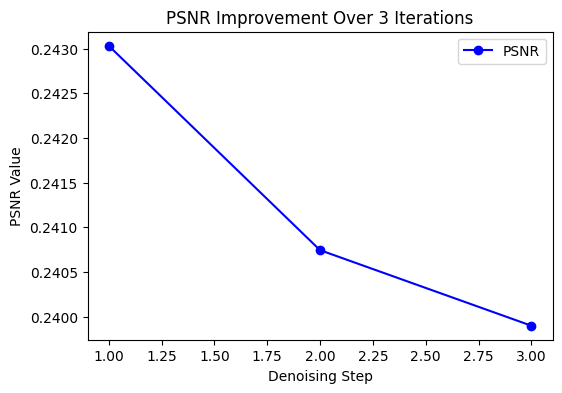

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the trained model
model_path = "C:\\Users\\nandh\\Desktop\\project files\\a_deeper_unet_model.keras"
model = load_model(model_path)

def preprocess_single_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def iterative_denoising(image, clean_image=None, steps=5):
    """Applies multiple inference steps for better denoising and tracks improvements."""
    denoised_images = [image[0]]  # Store intermediate results
    psnr_values = []

    for step in range(steps):
        image = model.predict(image)
        denoised_image = image[0]

        if clean_image is not None:
            psnr_step = psnr(clean_image, denoised_image)
        else:
            psnr_step = np.std(denoised_image)  # Approximate noise level

        psnr_values.append(psnr_step)
        denoised_images.append(denoised_image)

        # Print only the first 3 steps
        if step < 3:
            print(f"Step {step + 1}: PSNR = {psnr_step:.2f}")

    return denoised_images, psnr_values


# Folder containing noisy images
noisy_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Noisy_folder"
clean_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Ground_truth"  # If available
output_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Reconstructed_images"
os.makedirs(output_folder, exist_ok=True)

# List all images in the noisy folder
noisy_images = [img for img in os.listdir(noisy_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

if not noisy_images:
    print("No noisy images found in the folder.")
else:
    print("\nAvailable images in the folder:")
    for idx, img_name in enumerate(noisy_images):
        print(f"{idx + 1}. {img_name}")

    # User selects an image
    choice = int(input("\nEnter the number of the image to denoise: ")) - 1
    if choice < 0 or choice >= len(noisy_images):
        print("Invalid choice! Exiting.")
    else:
        selected_image_name = noisy_images[choice]
        noisy_image_path = os.path.join(noisy_folder, selected_image_name)
        clean_image_path = os.path.join(clean_folder, selected_image_name)

        # Load noisy image
        noisy_image = preprocess_single_image(noisy_image_path)

        # Load clean image if available
        if os.path.exists(clean_image_path):
            clean_image = preprocess_single_image(clean_image_path)[0]
        else:
            clean_image = None

        # Perform iterative denoising
        denoised_images, psnr_values = iterative_denoising(noisy_image, clean_image, steps=5)

        # Save final denoised image
        final_denoised_image = denoised_images[-1]
        output_path = os.path.join(output_folder, f"denoised_{selected_image_name}")
        denoised_bgr = cv2.cvtColor((final_denoised_image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, denoised_bgr)
        print(f"\nFinal denoised image saved to: {output_path}")

        # Plot first 3 denoising steps
        steps_to_show = min(3, len(denoised_images) - 1)

        plt.figure(figsize=(15, 5))
        for i in range(steps_to_show + 1):  # +1 to include noisy image
            plt.subplot(1, steps_to_show + 1, i + 1)
            plt.imshow(denoised_images[i])
            if i == 0:
                plt.title("Noisy Image")
            else:
                plt.title(f"Step {i} (PSNR = {psnr_values[i-1]:.2f})")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Plot PSNR improvement trend (only first 3 values)
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, steps_to_show + 1), psnr_values[:steps_to_show], marker='o', linestyle='-', color='b', label='PSNR')
        plt.xlabel("Denoising Step")
        plt.ylabel("PSNR Value")
        plt.title("PSNR Improvement Over 3 Iterations")
        plt.legend()
        plt.show()



Available images in the folder:
1. noisy_10961455225_0786d3edd2_c.jpg
2. noisy_1110822219_a079aeff30_c.jpg
3. noisy_11905744206_c9273e7489_c.jpg
4. noisy_11957512115_382fbccc03_c.jpg
5. noisy_127215712_ff5b654d07_c.jpg
6. noisy_1286073711_06165cae4c_c.jpg
7. noisy_12987770865_fe17618f19_c.jpg
8. noisy_12987811255_7135b5ecbd_c.jpg
9. noisy_12988124424_18a549ee57_c.jpg
10. noisy_13436252374_316e4599b3_c.jpg
11. noisy_13896128349_7b90ec6039_c.jpg
12. noisy_14099227957_2932386d88_c.jpg
13. noisy_14344194855_629eeda1a0_c.jpg
14. noisy_144839343_db2326a111_c.jpg
15. noisy_14888751212_5e802d8a2d_c.jpg
16. noisy_15135568915_7b836b9bc9_c.jpg
17. noisy_15236809297_c33917a48c_c.jpg
18. noisy_15307379319_b8c23e52d5_c.jpg
19. noisy_15363588760_764dafdce4_c.jpg
20. noisy_15450699883_1163793e69_c.jpg
21. noisy_15623223185_e4206be390_c.jpg
22. noisy_15904356149_aa61e5c5eb_c.jpg
23. noisy_16064376356_623e236f3c_c.jpg
24. noisy_16586971521_ddd2cffde1_c.jpg
25. noisy_16705397107_ec00b87bdb_c.jpg
26. noi

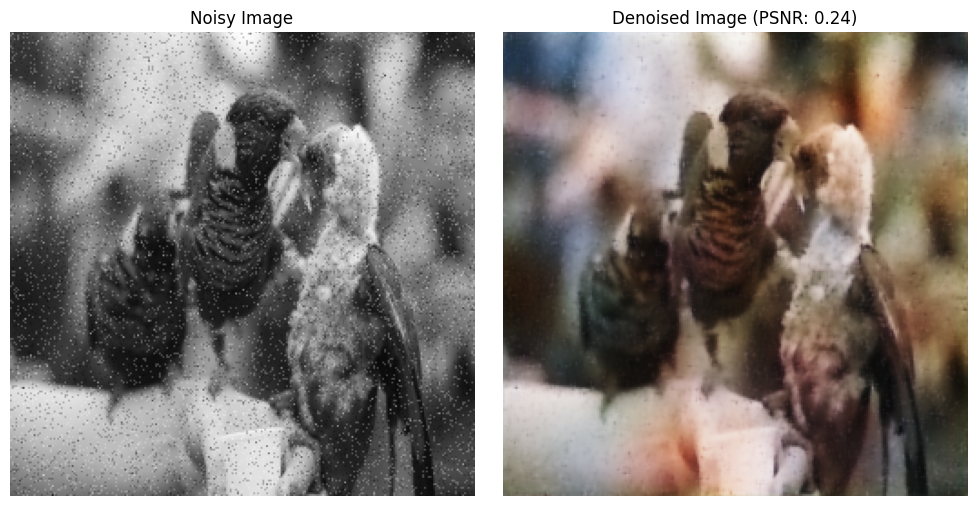

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the trained model
model_path = "C:\\Users\\nandh\\Desktop\\project files\\a_deeper_unet_model.keras"
model = load_model(model_path)

def preprocess_single_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Folder containing noisy images
noisy_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Noisy_folder"
clean_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Ground_truth"  # If available
output_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Reconstructed_images"
os.makedirs(output_folder, exist_ok=True)

# List all images in the noisy folder
noisy_images = [img for img in os.listdir(noisy_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

if not noisy_images:
    print("No noisy images found in the folder.")
else:
    print("\nAvailable images in the folder:")
    for idx, img_name in enumerate(noisy_images):
        print(f"{idx + 1}. {img_name}")

    # User selects an image
    choice = int(input("\nEnter the number of the image to denoise: ")) - 1
    if choice < 0 or choice >= len(noisy_images):
        print("Invalid choice! Exiting.")
    else:
        selected_image_name = noisy_images[choice]
        noisy_image_path = os.path.join(noisy_folder, selected_image_name)
        clean_image_path = os.path.join(clean_folder, selected_image_name)

        # Load noisy image
        noisy_image = preprocess_single_image(noisy_image_path)

        # Load clean image if available
        if os.path.exists(clean_image_path):
            clean_image = preprocess_single_image(clean_image_path)[0]
        else:
            clean_image = None

        # Perform single-step denoising
        denoised_image = model.predict(noisy_image)[0]
        
        # Compute PSNR value
        if clean_image is not None:
            psnr_value = psnr(clean_image, denoised_image)
            print(f"PSNR after step 1: {psnr_value:.2f}")
        else:
            psnr_value = np.std(denoised_image)  # Approximate noise level
            print(f"Estimated Noise Level: {psnr_value:.2f}")

        # Save final denoised image
        output_path = os.path.join(output_folder, f"denoised_{selected_image_name}")
        denoised_bgr = cv2.cvtColor((denoised_image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, denoised_bgr)
        print(f"\nFinal denoised image saved to: {output_path}")

        # Plot noisy vs denoised image
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(noisy_image[0])
        plt.title("Noisy Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(denoised_image)
        plt.title(f"Denoised Image (PSNR: {psnr_value:.2f})")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step

Final denoised image saved to: C:\Users\nandh\Desktop\project files\SALT AND PEPPER\Reconstructed_images\denoised_images (1).jpeg


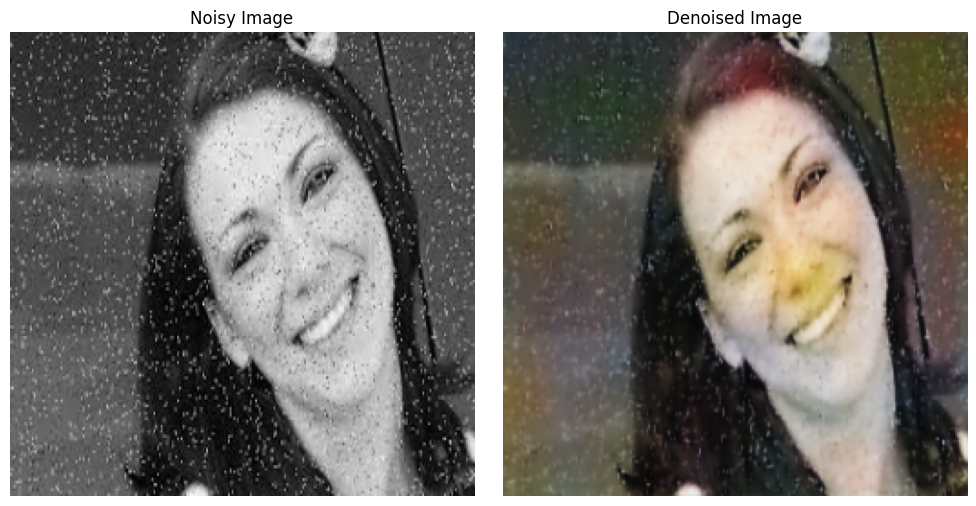

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the trained model
model_path = "C:\\Users\\nandh\\Desktop\\project files\\a_deeper_unet_model.keras"
model = load_model(model_path)

def preprocess_single_image(image_path, target_size=(256, 256)):
    """Load, resize, normalize, and preprocess a single image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Input custom noisy image path
custom_noisy_image_path = r"C:\Users\nandh\Desktop\images (1).jpeg"

# Validate the file path
if not os.path.exists(custom_noisy_image_path):
    print("Invalid file path! Please check and try again.")
else:
    # Process the noisy image
    noisy_image = preprocess_single_image(custom_noisy_image_path)

    # Perform denoising using the model
    denoised_image = model.predict(noisy_image)[0]

    # Save the output image
    output_folder = "C:\\Users\\nandh\\Desktop\\project files\\SALT AND PEPPER\\Reconstructed_images"
    os.makedirs(output_folder, exist_ok=True)

    output_image_name = os.path.basename(custom_noisy_image_path)
    output_path = os.path.join(output_folder, f"denoised_{output_image_name}")

    denoised_bgr = cv2.cvtColor((denoised_image * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, denoised_bgr)
    print(f"\nFinal denoised image saved to: {output_path}")

    # Display images
    plt.figure(figsize=(10, 5))
    
    # Show noisy image
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_image[0])
    plt.title("Noisy Image")
    plt.axis('off')

    # Show denoised image
    plt.subplot(1, 2, 2)
    plt.imshow(denoised_image)
    plt.title("Denoised Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Step 1: PSNR = 0.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Step 2: PSNR = 0.23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Step 3: PSNR = 0.22
Step 1 denoised image saved to: C:\Users\nandh\Desktop\project files\SALT AND PEPPER\Reconstructed_images\denoised_step1.png
Step 2 denoised image saved to: C:\Users\nandh\Desktop\project files\SALT AND PEPPER\Reconstructed_images\denoised_step2.png
Step 3 denoised image saved to: C:\Users\nandh\Desktop\project files\SALT AND PEPPER\Reconstructed_images\denoised_step3.png


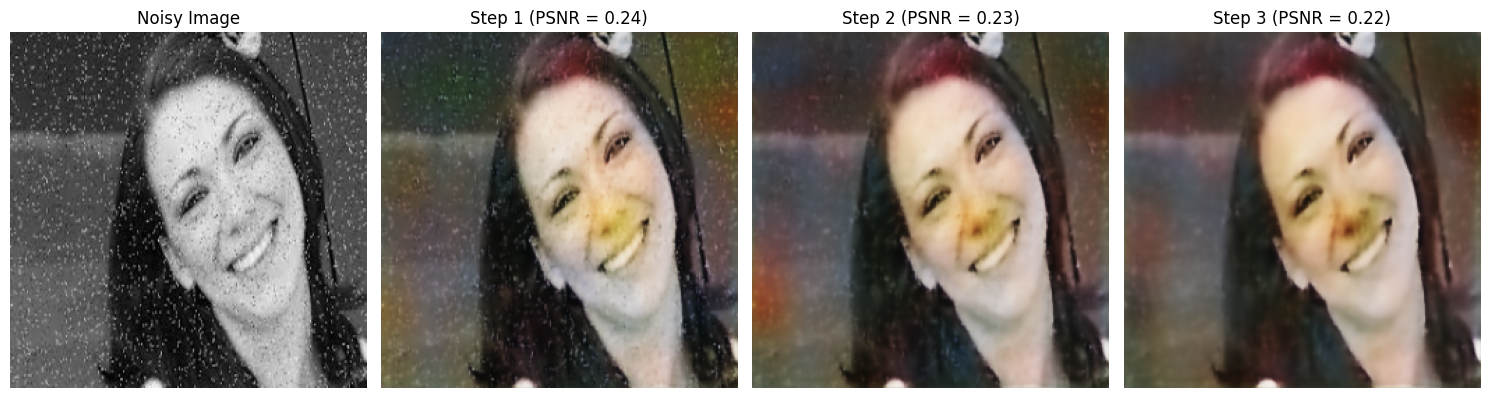

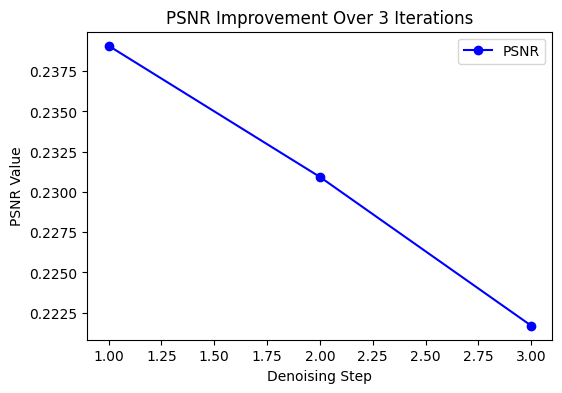

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the trained model
model_path = r"C:\Users\nandh\Desktop\project files\a_deeper_unet_model.keras"
model = load_model(model_path)

# Function to preprocess a single image
def preprocess_single_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to perform step-wise denoising
def iterative_denoising(image, clean_image=None, steps=3):
    """Applies multiple inference steps for better denoising and tracks improvements."""
    denoised_images = [image[0]]  # Store intermediate results
    psnr_values = []

    for step in range(steps):
        image = model.predict(image)
        denoised_image = image[0]

        if clean_image is not None:
            psnr_step = psnr(clean_image, denoised_image)
        else:
            psnr_step = np.std(denoised_image)  # Approximate noise level

        psnr_values.append(psnr_step)
        denoised_images.append(denoised_image)

        print(f"Step {step + 1}: PSNR = {psnr_step:.2f}")

    return denoised_images, psnr_values

# Get user input for the image path
image_path = r"C:\Users\nandh\Desktop\images (1).jpeg"

# Validate file path
if not os.path.isfile(image_path):
    print("Invalid file path! Please check and try again.")
    exit()

# Define output folder
output_folder = r"C:\Users\nandh\Desktop\project files\SALT AND PEPPER\Reconstructed_images"
os.makedirs(output_folder, exist_ok=True)

# Preprocess the noisy image
noisy_image = preprocess_single_image(image_path)

# Perform iterative denoising (3 steps)
denoised_images, psnr_values = iterative_denoising(noisy_image, steps=3)

# Save the denoised images at each step
for step in range(1, 4):
    output_path = os.path.join(output_folder, f"denoised_step{step}.png")
    denoised_bgr = cv2.cvtColor((denoised_images[step] * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, denoised_bgr)
    print(f"Step {step} denoised image saved to: {output_path}")

# Plot noisy vs denoised images (3 steps)
plt.figure(figsize=(15, 5))
for i in range(4):  # Noisy + 3 steps
    plt.subplot(1, 4, i + 1)
    plt.imshow(denoised_images[i])
    if i == 0:
        plt.title("Noisy Image")
    else:
        plt.title(f"Step {i} (PSNR = {psnr_values[i-1]:.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot PSNR improvement trend
plt.figure(figsize=(6, 4))
plt.plot(range(1, 4), psnr_values, marker='o', linestyle='-', color='b', label='PSNR')
plt.xlabel("Denoising Step")
plt.ylabel("PSNR Value")
plt.title("PSNR Improvement Over 3 Iterations")
plt.legend()
plt.show()
